# EDA Soil

In [1]:
data_folder = "../../data/processed"
data_files = {
    "fire": "fire/fire.csv",
    "landcover": "landcover",
    "climate": "climate",
    "elevation": "elevation",
    "soil_raster": "soil/smu_raster.nc",
    "soil_att": "soil/soil.csv"
}

raw_data_folder = "../../data/raw/"
raw_data_files = { 
    "dz_boundaries": "gadm41_DZA_shp/gadm41_DZA_0.shp",
    "tn_boundaries": "gadm41_TUN_shp/gadm41_TUN_0.shp"
}

In [2]:
import xarray as xr
import os
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import rasterio
import geopandas
import seaborn as sns

## Loading the data

In [3]:
filepath = os.path.join(data_folder, data_files["soil_raster"])
ds = xr.open_dataset(filepath)
print(ds)                
print(ds.variables)      
print(ds["HWSD2_SMU_ID"].shape) 
arr = ds["HWSD2_SMU_ID"].values 

<xarray.Dataset> Size: 11MB
Dimensions:       (y: 2233, x: 2480)
Coordinates:
  * y             (y) float64 18kB 37.56 37.55 37.55 37.54 ... 18.98 18.97 18.96
  * x             (x) float64 20kB -8.671 -8.662 -8.654 ... 11.97 11.98 11.99
Data variables:
    HWSD2_SMU_ID  (y, x) uint16 11MB ...
Frozen({'y': <xarray.IndexVariable 'y' (y: 2233)> Size: 18kB
array([37.5625  , 37.554167, 37.545833, ..., 18.979167, 18.970833, 18.9625  ],
      shape=(2233,)), 'x': <xarray.IndexVariable 'x' (x: 2480)> Size: 20kB
array([-8.670833, -8.6625  , -8.654167, ..., 11.970833, 11.979167, 11.9875  ],
      shape=(2480,)), 'HWSD2_SMU_ID': <xarray.Variable (y: 2233, x: 2480)> Size: 11MB
[5537840 values with dtype=uint16]
Attributes:
    crs:        OGC:CRS84
    transform:  [0.00833333333333333, 0.0, -8.674999999999727, 0.0, -0.008333...})
(2233, 2480)


In [4]:
filepath = os.path.join(data_folder, data_files["soil_att"])
soil_df = pd.read_csv(filepath)
soil_df.head()

COARSE  SAND  SILT  CLAY  TEXTURE_USDA TEXTURE_SOTER  BULK  REF_BULK  \
0      11    40    41    19           9.0             M  1.47      1.69   
1      11    40    41    19           9.0             M  1.47      1.69   
2      11    40    41    19           9.0             M  1.47      1.69   
3       7    89     5     6          12.0             C  1.39      1.34   
4       9    88     6     6          12.0             C  1.62      1.34   

   ORG_CARBON  PH_WATER  ...  CEC_EFF  TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  \
0       2.037       5.3  ...        6    5    47        21    1         0.0   
1       2.037       5.3  ...        6    5    47        21    1         0.0   
2       2.037       5.3  ...        6    5    47        21    1         0.0   
3       0.242       6.9  ...        5    4    89         0    2         4.4   
4       0.255       8.0  ...       12   12   100         0    2         5.8   

   GYPSUM  ELEC_COND  SHARE  HWSD2_SMU_ID  
0     0.1          0    100         31816  
1     0.1          0     30         31801  
2     0.1          0     70         31802  
3     0.1          0     10          1694  
4     0.1          0     30         32050  

[5 rows x 24 columns]

## Understanding the Attributes

In [5]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COARSE         861 non-null    int64  
 1   SAND           861 non-null    int64  
 2   SILT           861 non-null    int64  
 3   CLAY           861 non-null    int64  
 4   TEXTURE_USDA   842 non-null    float64
 5   TEXTURE_SOTER  861 non-null    object 
 6   BULK           861 non-null    float64
 7   REF_BULK       842 non-null    float64
 8   ORG_CARBON     861 non-null    float64
 9   PH_WATER       861 non-null    float64
 10  TOTAL_N        861 non-null    float64
 11  CN_RATIO       861 non-null    int64  
 12  CEC_SOIL       861 non-null    int64  
 13  CEC_CLAY       861 non-null    int64  
 14  CEC_EFF        861 non-null    int64  
 15  TEB            861 non-null    int64  
 16  BSAT           861 non-null    int64  
 17  ALUM_SAT       861 non-null    int64  
 18  ESP       

In [6]:
soil_df.head()

COARSE  SAND  SILT  CLAY  TEXTURE_USDA TEXTURE_SOTER  BULK  REF_BULK  \
0      11    40    41    19           9.0             M  1.47      1.69   
1      11    40    41    19           9.0             M  1.47      1.69   
2      11    40    41    19           9.0             M  1.47      1.69   
3       7    89     5     6          12.0             C  1.39      1.34   
4       9    88     6     6          12.0             C  1.62      1.34   

   ORG_CARBON  PH_WATER  ...  CEC_EFF  TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  \
0       2.037       5.3  ...        6    5    47        21    1         0.0   
1       2.037       5.3  ...        6    5    47        21    1         0.0   
2       2.037       5.3  ...        6    5    47        21    1         0.0   
3       0.242       6.9  ...        5    4    89         0    2         4.4   
4       0.255       8.0  ...       12   12   100         0    2         5.8   

   GYPSUM  ELEC_COND  SHARE  HWSD2_SMU_ID  
0     0.1          0    100         31816  
1     0.1          0     30         31801  
2     0.1          0     70         31802  
3     0.1          0     10          1694  
4     0.1          0     30         32050  

[5 rows x 24 columns]

In [7]:
soil_df.nunique()

COARSE            30
SAND              49
SILT              36
CLAY              37
TEXTURE_USDA       7
TEXTURE_SOTER      4
BULK              47
REF_BULK          41
ORG_CARBON        92
PH_WATER          36
TOTAL_N           75
CN_RATIO          15
CEC_SOIL          34
CEC_CLAY          46
CEC_EFF           52
TEB               55
BSAT              36
ALUM_SAT          17
ESP               24
TCARBON_EQ        59
GYPSUM            33
ELEC_COND         11
SHARE             21
HWSD2_SMU_ID     385
dtype: int64

=> **Categorical Features**:
* `TEXTURE_USDA`
* `TEXTURE_SOTER`

In [8]:
cat_features = ['TEXTURE_USDA', 'TEXTURE_SOTER']

num_features = [
    "COARSE", "SAND", "SILT", "CLAY",
    "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER", "TOTAL_N", "CN_RATIO",
    "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB", "BSAT", "ALUM_SAT", "ESP",
    "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]

`SHARE` represents the percentage of each soil type in a specific SMU. 

In [9]:
soil_df.groupby('HWSD2_SMU_ID')['SHARE'].value_counts()

HWSD2_SMU_ID  SHARE
36            100      1
61            50       2
87            33       2
              34       1
92            50       2
                      ..
32049         20       3
              40       1
32050         20       1
              30       1
              50       1
Name: count, Length: 764, dtype: int64

In [10]:
unique_smu_ids = np.unique(soil_df['HWSD2_SMU_ID'])
print(unique_smu_ids[:10])

unique_ids = np.unique(arr)
print(unique_ids[:10])

print(all([raster_id in unique_smu_ids for raster_id in unique_ids]))
print([raster_id for raster_id in unique_ids if raster_id not in unique_smu_ids])


[ 36  61  87  92  99 193 195 251 262 320]
[ 36  61  87  92  99 193 195 251 262 320]
False
[np.uint16(65535)]


In [11]:
print((arr[0] == np.uint16(65535)).sum())

2480


In [12]:
soil_df['TEXTURE_SOTER'].value_counts()


TEXTURE_SOTER
M    672
C    104
F     66
-     19
Name: count, dtype: int64

In [13]:
soil_df['TEXTURE_USDA'].value_counts()


TEXTURE_USDA
9.0     339
11.0    304
5.0     102
3.0      52
12.0     24
10.0     17
7.0       4
Name: count, dtype: int64

In [14]:
soil_df['HWSD2_SMU_ID'].value_counts()

HWSD2_SMU_ID
1514     7
1132     6
1766     5
1800     5
1823     5
        ..
31907    1
31975    1
31884    1
31987    1
1972     1
Name: count, Length: 385, dtype: int64

## Aggregating SMU Entries

### Using Weighted Mean for Numerical Features

In [15]:
def weighted_avg(group):
    weights = group['SHARE'] / 100.0  # Convert percent to fraction
    result = {}
    for feature in num_features:
        values = group[feature]
        if np.issubdtype(values.dtype, np.number):
            result[feature] = np.average(values, weights=weights) if weights.sum() > 0 else np.nan
        else:
            result[feature] = np.nan  # skip non-numeric fields
    return pd.Series(result)

# Apply the function to each group
aggregated_df = soil_df.groupby('HWSD2_SMU_ID').apply(weighted_avg).reset_index()

/tmp/ipykernel_46945/271091786.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df = soil_df.groupby('HWSD2_SMU_ID').apply(weighted_avg).reset_index()


### Using Mode for Categorical Features

In [16]:
def most_common_texture(group, column):
    counts = group[column].value_counts()
    return counts.index[0] if not counts.empty else np.nan


aggregated_df['TEXTURE_USDA'] = soil_df.groupby('HWSD2_SMU_ID').apply(
    lambda g: most_common_texture(g, 'TEXTURE_USDA')
).reset_index(drop=True)

aggregated_df['TEXTURE_SOTER'] = soil_df.groupby('HWSD2_SMU_ID').apply(
    lambda g: most_common_texture(g, 'TEXTURE_SOTER')
).reset_index(drop=True)

/tmp/ipykernel_46945/4061189495.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df['TEXTURE_USDA'] = soil_df.groupby('HWSD2_SMU_ID').apply(
/tmp/ipykernel_46945/4061189495.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df['TEXTURE_SOTER'] = soil_df.groupby('HWSD2_SMU_ID').apply(


In [17]:
aggregated_df.shape[0], soil_df.shape[0]

(385, 861)

In [18]:
df = aggregated_df

In [19]:
df.isna().sum()

HWSD2_SMU_ID      0
COARSE            0
SAND              0
SILT              0
CLAY              0
BULK              0
REF_BULK         19
ORG_CARBON        0
PH_WATER          0
TOTAL_N           0
CN_RATIO          0
CEC_SOIL          0
CEC_CLAY          0
CEC_EFF           0
TEB               0
BSAT              0
ALUM_SAT          0
ESP               0
TCARBON_EQ        0
GYPSUM            0
ELEC_COND         0
TEXTURE_USDA      6
TEXTURE_SOTER     0
dtype: int64

In [20]:
df[num_features].describe()

COARSE        SAND        SILT        CLAY        BULK    REF_BULK  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  366.000000   
mean    10.939195   46.536338   29.151481   20.848026    1.275445    1.713325   
std      6.520025   14.238063    8.166655    9.378673    0.845080    0.116045   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000    1.200000   
25%      6.800000   38.700000   26.000000   16.100000    1.378000    1.650000   
50%     10.100000   48.400000   30.600000   18.800000    1.430000    1.696000   
75%     14.200000   55.000000   34.000000   24.600000    1.465500    1.779750   
max     37.600000   90.000000   45.200000   55.000000    1.760000    2.030000   

       ORG_CARBON    PH_WATER     TOTAL_N    CN_RATIO    CEC_SOIL    CEC_CLAY  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  385.000000   
mean     0.743868    7.379356    0.791243    9.428987   15.081091   58.246831   
std      0.924367    1.837071    0.855159    2.310637    6.713825   14.625024   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   
25%      0.589000    7.555000    0.697000    9.000000   12.400000   51.000000   
50%      0.664600    7.900000    0.850000    9.400000   14.200000   60.500000   
75%      0.970000    8.100000    1.047000   10.200000   17.000000   68.600000   
max      4.192600    8.600000    2.962000   18.050000   41.000000   83.000000   

          CEC_EFF         TEB        BSAT    ALUM_SAT         ESP  TCARBON_EQ  \
count  385.000000  385.000000  385.000000  385.000000  385.000000  385.000000   
mean    37.035013   36.340468   91.276364    0.423636    7.134597    8.993883   
std     21.498456   21.764666   17.175475    2.929335   12.864611    5.306701   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   
25%     27.000000   26.000000   92.200000    0.000000    2.000000    5.860000   
50%     32.600000   32.100000   97.300000    0.000000    3.000000    8.940000   
75%     41.000000   40.200000   99.400000    0.000000    4.000000   12.300000   
max    143.000000  143.000000  100.000000   24.000000   67.000000   27.059999   

           GYPSUM   ELEC_COND  
count  385.000000  385.000000  
mean     4.848712    2.131455  
std     10.204140    4.365477  
min     -9.000000   -9.000000  
25%      0.550000    0.800000  
50%      1.360000    1.000000  
75%      2.980000    1.400000  
max     57.599998   32.000000

In [21]:
soil_df[num_features].describe()

COARSE        SAND        SILT        CLAY        BULK    REF_BULK  \
count  861.000000  861.000000  861.000000  861.000000  861.000000  842.000000   
mean    11.787456   46.955865   29.397213   21.203252    1.318780    1.714905   
std     10.006283   16.134836    9.079760   10.372562    0.780874    0.132114   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000    1.200000   
25%      4.000000   40.000000   26.000000   16.000000    1.370000    1.650000   
50%      9.000000   47.000000   30.000000   20.000000    1.440000    1.710000   
75%     18.000000   55.000000   36.000000   24.000000    1.470000    1.780000   
max     46.000000   90.000000   53.000000   55.000000    1.760000    2.040000   

       ORG_CARBON    PH_WATER     TOTAL_N    CN_RATIO    CEC_SOIL    CEC_CLAY  \
count  861.000000  861.000000  861.000000  861.000000  861.000000  861.000000   
mean     0.830069    7.449129    0.859988    9.674797   15.344948   58.126597   
std      0.968955    1.803727    0.829038    2.503705    7.651307   17.204894   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   
25%      0.589000    7.400000    0.650000    9.000000   13.000000   48.000000   
50%      0.697000    8.000000    0.830000    9.000000   14.000000   61.000000   
75%      1.136000    8.200000    1.110000   10.000000   17.000000   71.000000   
max      7.326000    8.600000    3.690000   24.000000   41.000000   83.000000   

          CEC_EFF         TEB        BSAT    ALUM_SAT         ESP  TCARBON_EQ  \
count  861.000000  861.000000  861.000000  861.000000  861.000000  861.000000   
mean    36.076655   35.135889   91.348432    0.421603    6.811847    9.072125   
std     23.647827   24.236123   18.310991    3.396640   13.743308    6.942119   
min     -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   -9.000000   
25%     23.000000   20.000000   93.000000    0.000000    2.000000    4.200000   
50%     31.000000   31.000000   99.000000    0.000000    3.000000    8.900000   
75%     38.000000   38.000000  100.000000    0.000000    4.000000   12.900000   
max    143.000000  143.000000  100.000000   40.000000   67.000000   31.299999   

           GYPSUM   ELEC_COND  
count  861.000000  861.000000  
mean     4.345064    2.096400  
std     10.999932    4.527821  
min     -9.000000   -9.000000  
25%      0.300000    1.000000  
50%      0.600000    1.000000  
75%      3.300000    1.000000  
max     57.599998   32.000000

## Projection on Map

In [22]:
### Loading and merging the boundaries of Algeria and Tunisia
def load_dz_tn_boundaries(dz_shapefile_path, tn_shapefile_path):
    dz = geopandas.read_file(dz_shapefile_path)
    tn = geopandas.read_file(tn_shapefile_path)

    # Ensure both shapefiles use the same CRS 
    if dz.crs != tn.crs:
        tn = tn.to_crs(dz.crs)

    # Concatenate the GeoDataFrames
    boundaries = geopandas.GeoDataFrame(pd.concat([dz, tn], ignore_index=True), crs=dz.crs)

    return boundaries

# Shapefile downloaded from https://gadm.org/
dz_boundaries_filepath = os.path.join(raw_data_folder, raw_data_files["dz_boundaries"])
tn_boundaries_filepath = os.path.join(raw_data_folder, raw_data_files["tn_boundaries"])

boundaries = load_dz_tn_boundaries(dz_boundaries_filepath, tn_boundaries_filepath)

In [23]:
print(ds.get("HWSD2_SMU_ID", {}).attrs['transform'])

[0.00833333333333333, 0.0, -8.674999999999727, 0.0, -0.00833333333333333, 37.56666666666665, 0.0, 0.0, 1.0]


In [24]:
from affine import Affine

raw_transform = ds.get("HWSD2_SMU_ID", {}).attrs.get('transform', None)
raw_transform = list(map(float, raw_transform.strip('[').strip(']').split(',')))
if raw_transform is None:
    raise ValueError("Transform attribute missing.")
transform = Affine(*raw_transform)

In [25]:
print(arr[0])

[65535 65535 65535 ... 65535 65535 65535]


[65535 65535 65535 ... 65535 65535 65535]
Rendering column: COARSE


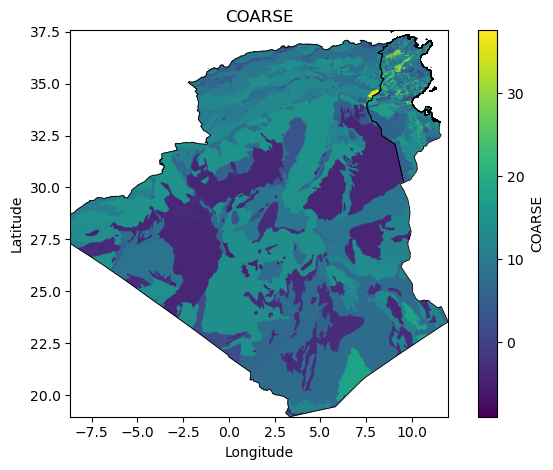

Rendering column: SAND


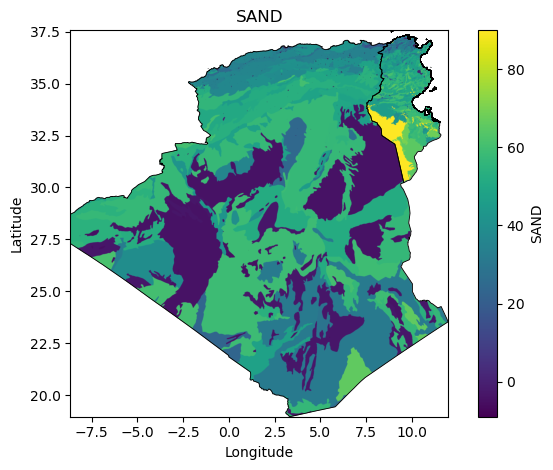

Rendering column: SILT


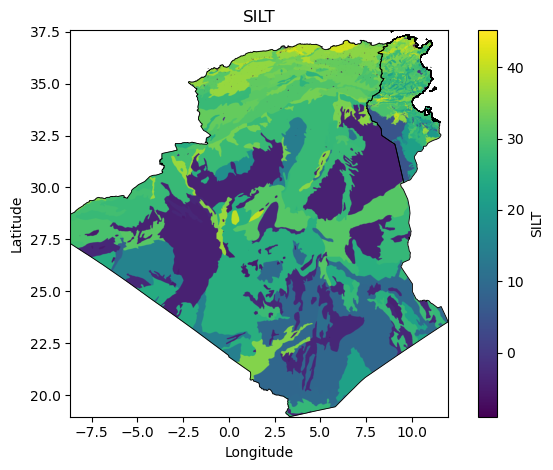

Rendering column: CLAY


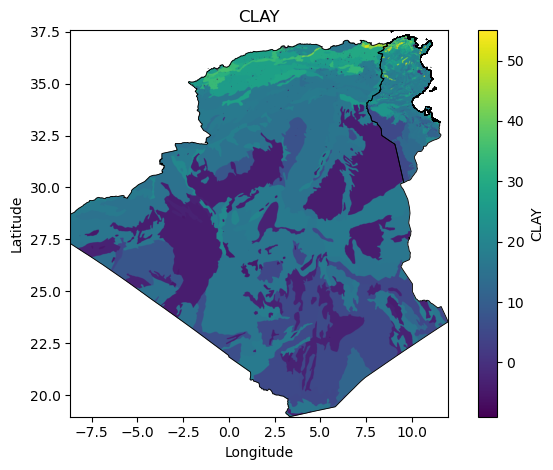

Rendering column: BULK


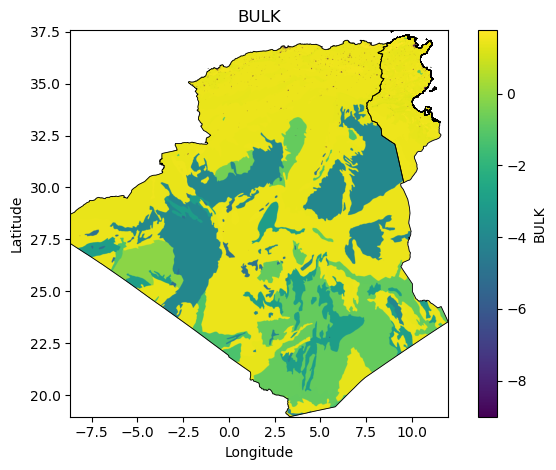

Rendering column: REF_BULK


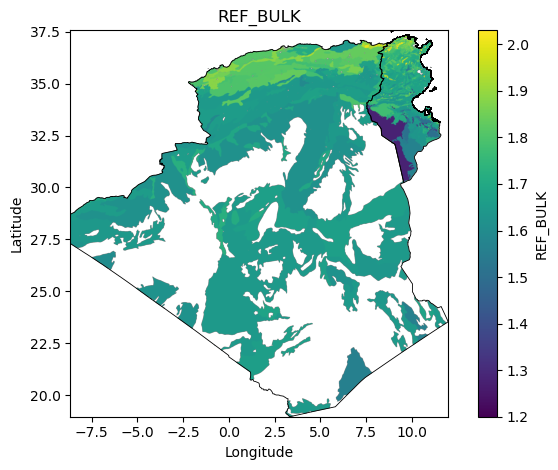

Rendering column: ORG_CARBON


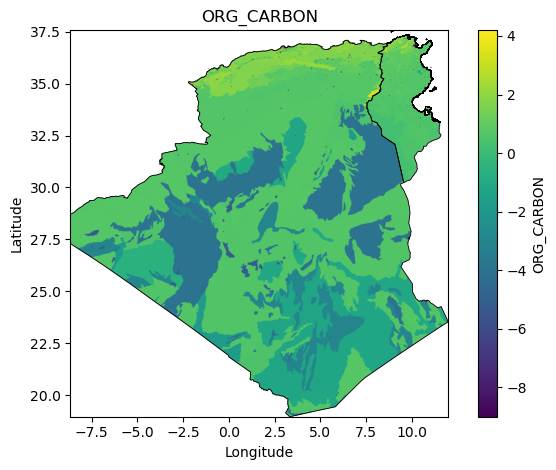

Rendering column: PH_WATER


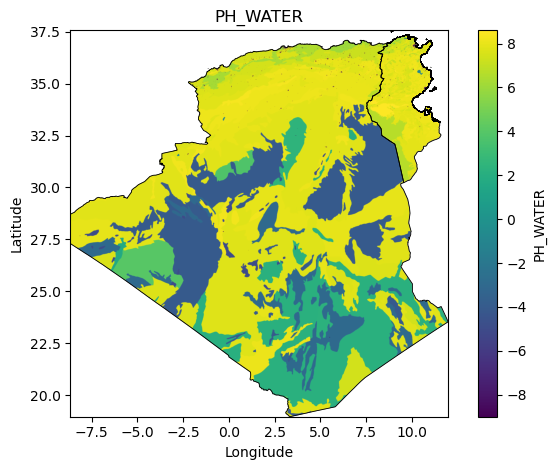

Rendering column: TOTAL_N


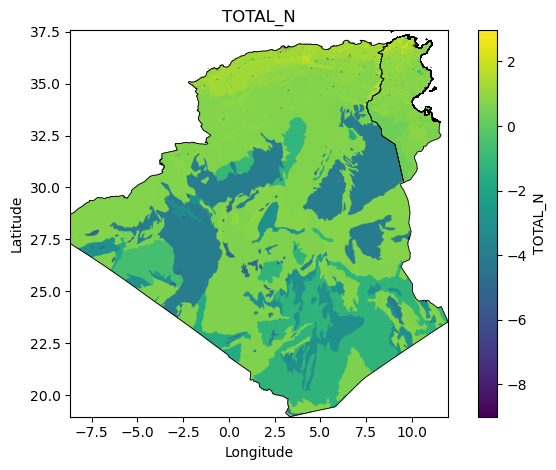

Rendering column: CN_RATIO


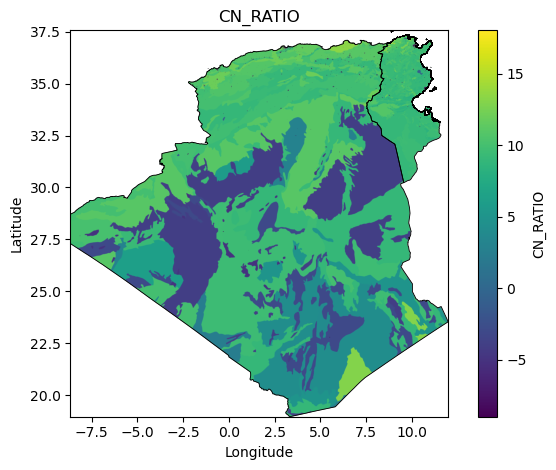

Rendering column: CEC_SOIL


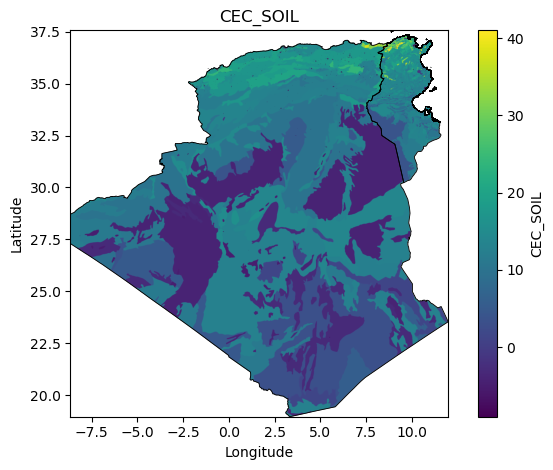

Rendering column: CEC_CLAY


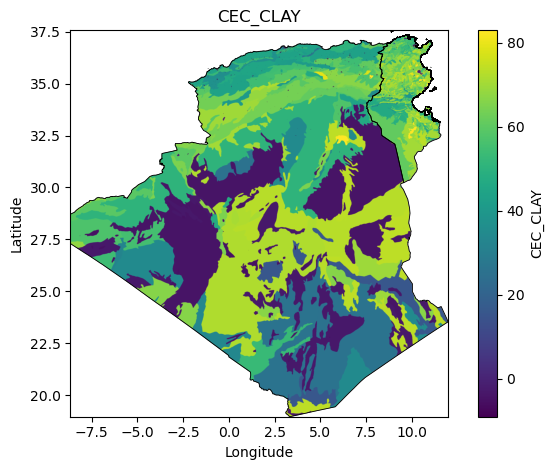

Rendering column: CEC_EFF


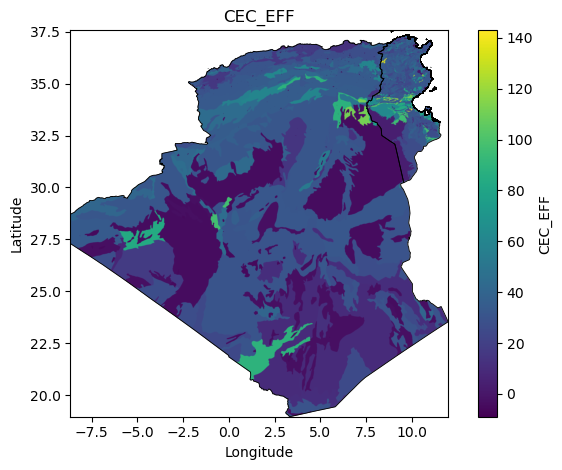

Rendering column: TEB


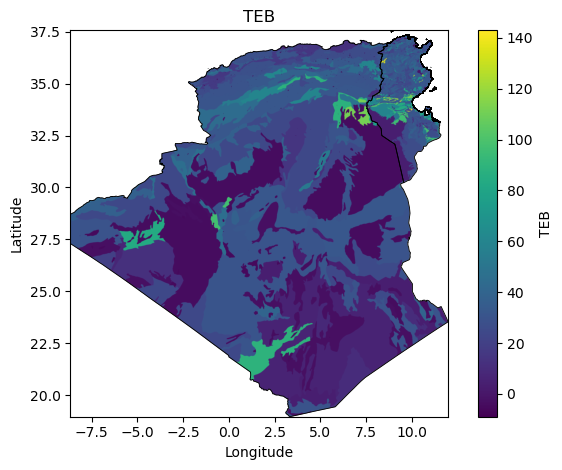

Rendering column: BSAT


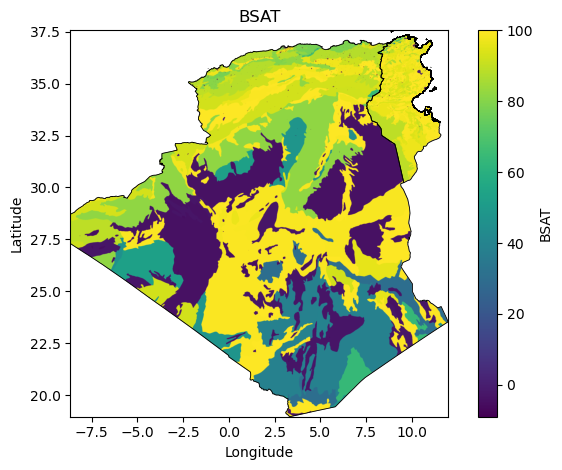

Rendering column: ALUM_SAT


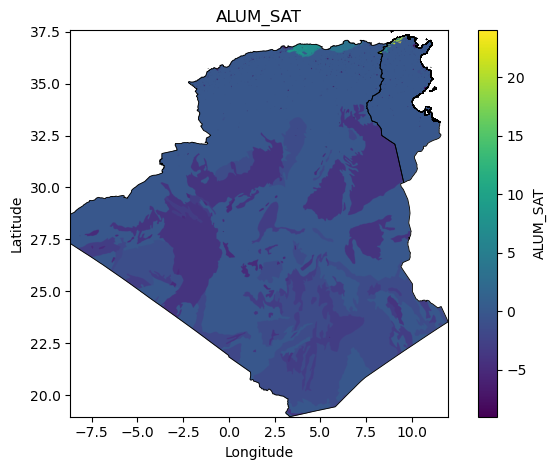

Rendering column: ESP


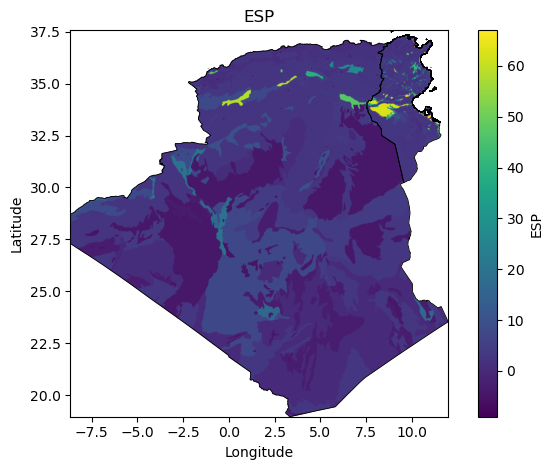

Rendering column: TCARBON_EQ


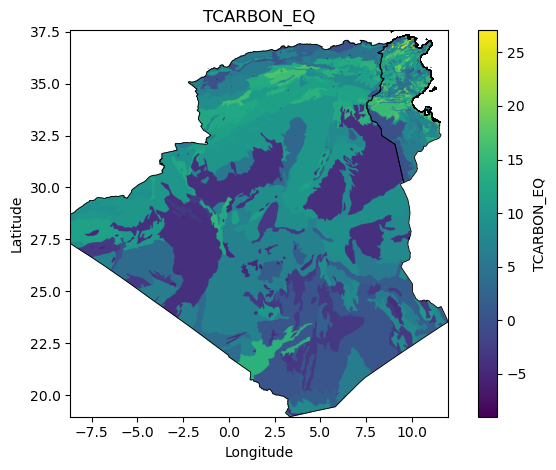

Rendering column: GYPSUM


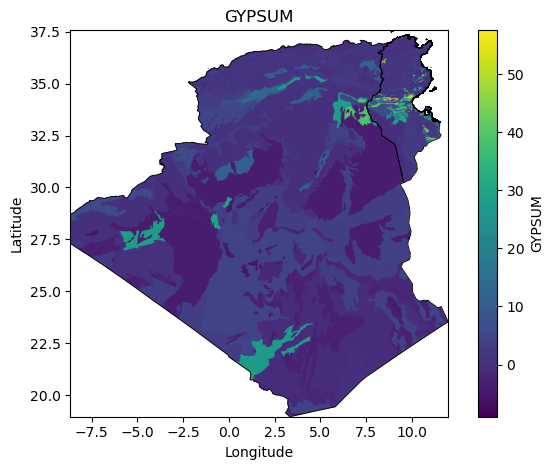

Rendering column: ELEC_COND


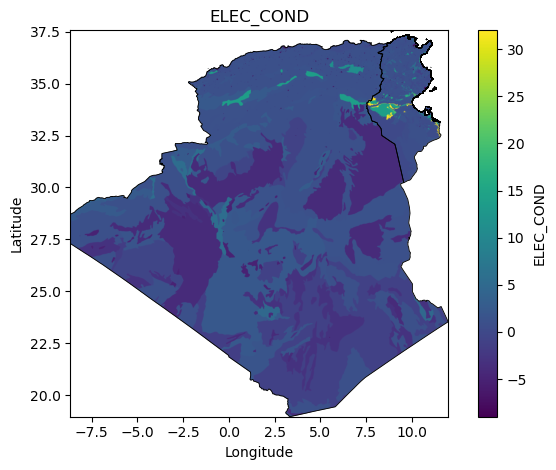

Rendering column: TEXTURE_USDA


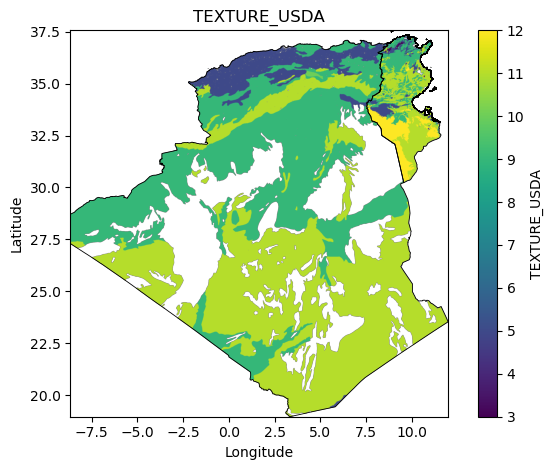

Rendering column: TEXTURE_SOTER


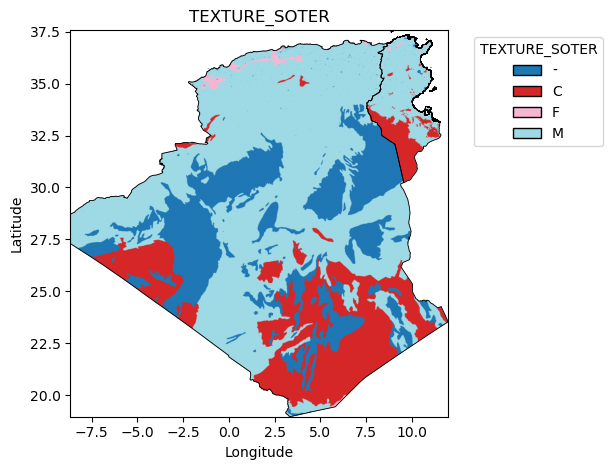

In [26]:
img = arr

# raster dims and flattened SMU ids
h, w = img.shape[0], img.shape[1]
flat_ids = img.ravel()

print(flat_ids)

# columns to visualize (skip the key id column if present)
id_col = 'HWSD2_SMU_ID'
cols = [c for c in df.columns if c != id_col]

for col in cols:
    try:
        print(f"Rendering column: {col}")
        series = df.set_index(id_col)[col]

        # numeric vs categorical
        if np.issubdtype(series.dtype, np.number):
            mapped = pd.Series(flat_ids).map(series)  # numeric, NaN where missing
            arr = mapped.values.reshape((h, w))

            # get bounds & extent
            minx, miny, maxx, maxy = rasterio.transform.array_bounds(h, w, transform)

            # plt.figure(figsize=(10, 8))
            im = plt.imshow(arr, cmap='viridis', extent=(minx, maxx, miny, maxy))
            if 'boundaries' in globals():
                boundaries.plot(ax=plt.gca(), facecolor='none', edgecolor='k', linewidth=0.6)
            plt.title(f"{col}")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")
            cbar = plt.colorbar(im)
            cbar.set_label(col)
            plt.tight_layout()

            plt.show()

        else:
            # categorical: map categories -> integers and display discrete colormap + legend
            cats = pd.Categorical(df[col].astype(str))  # convert to str to avoid issues
            cat_map = pd.Series(cats.codes, index=df[id_col].astype(int))
            mapped = pd.Series(flat_ids).map(cat_map)
            arr = mapped.values.reshape((h, w))

            # build colormap
            uniques = np.unique(cats.categories)
            n = len(uniques)
            cmap = plt.get_cmap('tab20', n)
            norm = mcolors.BoundaryNorm(np.arange(-0.5, n + 0.5, 1), cmap.N)

            minx, miny, maxx, maxy = rasterio.transform.array_bounds(h, w, transform)

            # plt.figure(figsize=(10, 8))
            im = plt.imshow(arr, cmap=cmap, norm=norm, extent=(minx, maxx, miny, maxy))
            if 'boundaries' in globals():
                boundaries.plot(ax=plt.gca(), facecolor='none', edgecolor='k', linewidth=0.6)
            plt.title(f"{col}")
            plt.xlabel("Longitude")
            plt.ylabel("Latitude")

            # legend: show mapping of colors -> categories
            # create custom legend patches
            from matplotlib.patches import Patch
            patches = []
            for i, label in enumerate(uniques):
                patches.append(Patch(facecolor=cmap(i), edgecolor='k', label=label))
            plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', title=col)
            plt.tight_layout()

            plt.show()

    except Exception as e:
        print(f"Failed to render {col}: {e}")

In [27]:
df.shape

(385, 23)

## Univariate Analysis



=================== COARSE ===========================



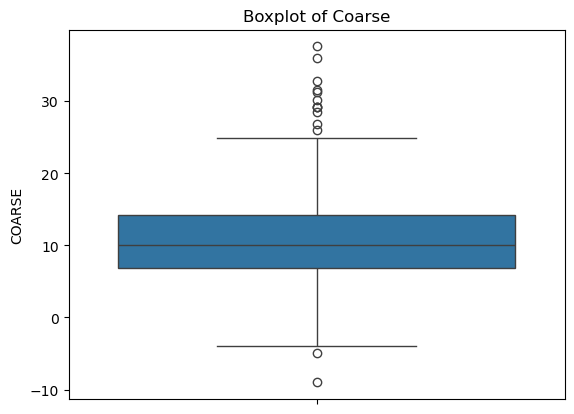

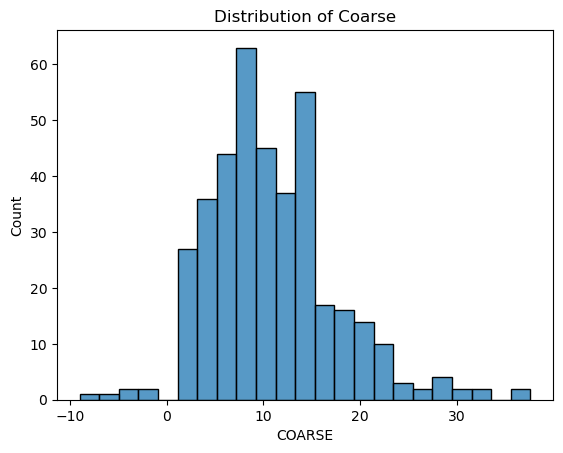



=================== SAND ===========================



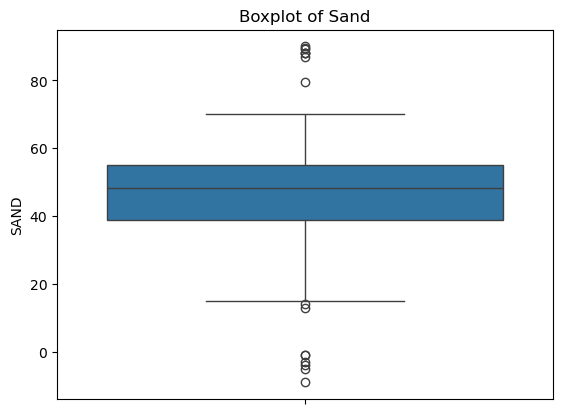

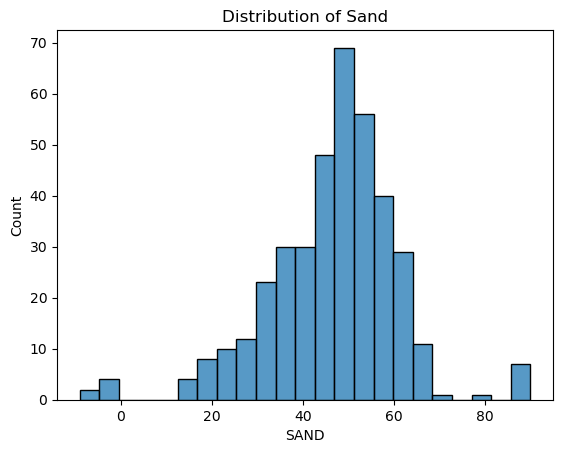



=================== SILT ===========================



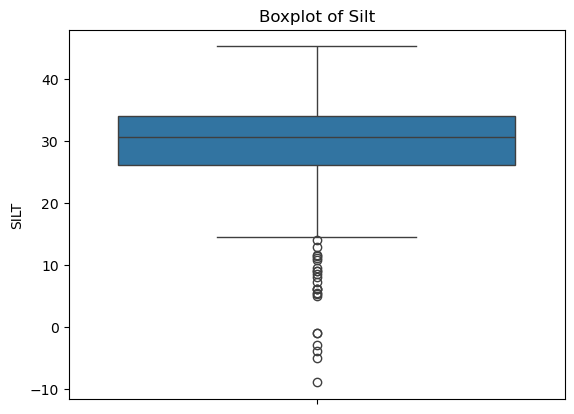

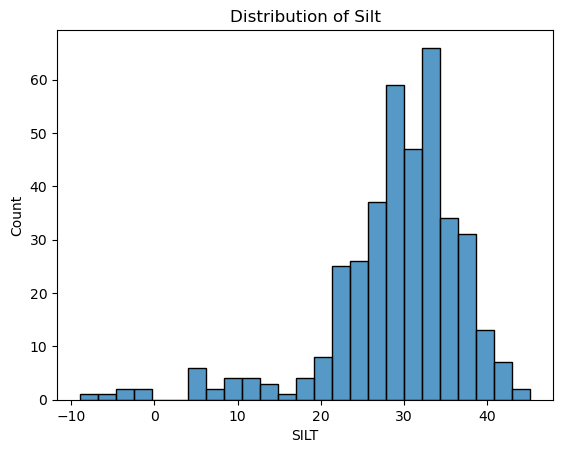



=================== CLAY ===========================



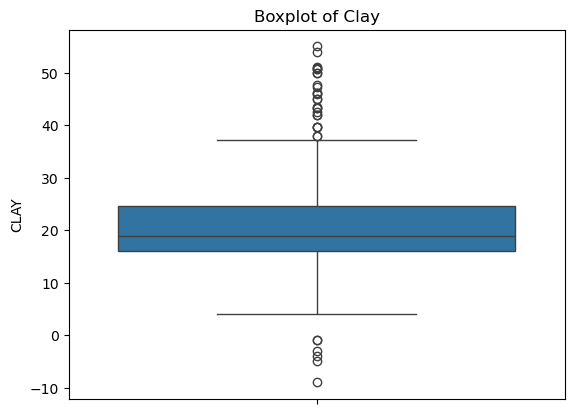

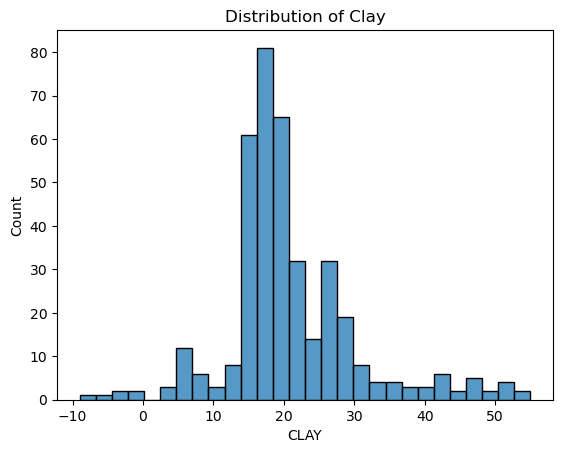



=================== BULK ===========================



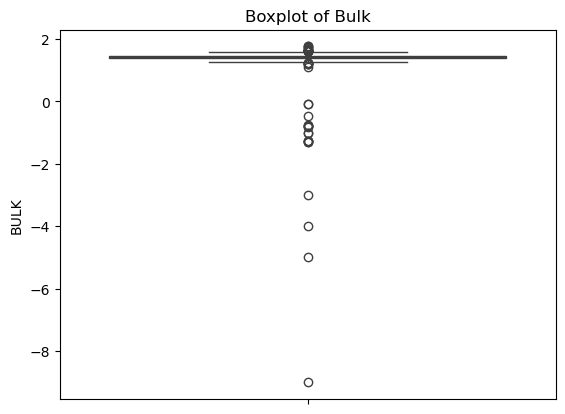

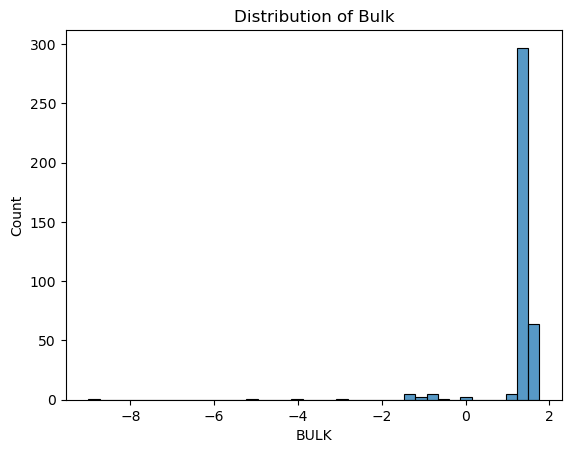



=================== REF_BULK ===========================



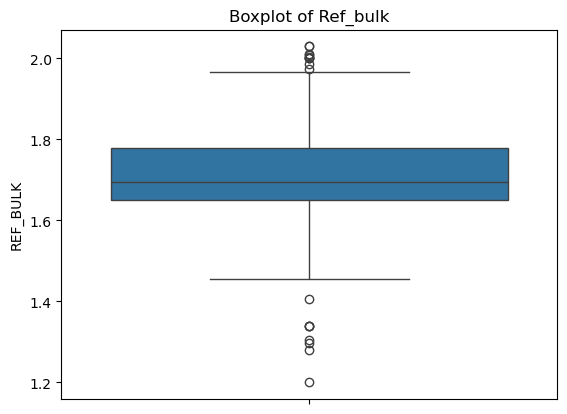

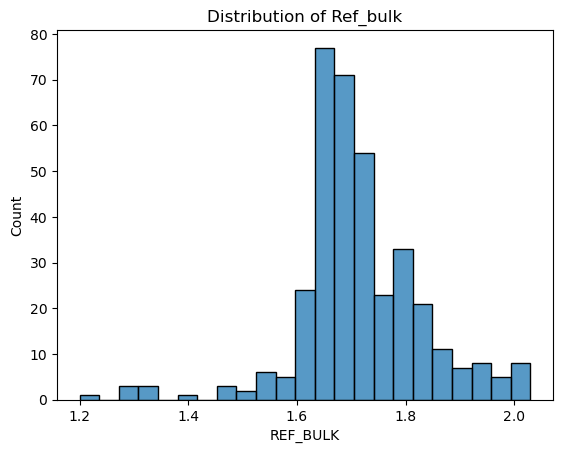



=================== ORG_CARBON ===========================



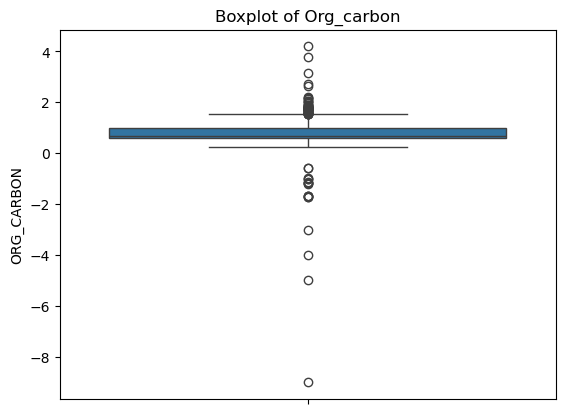

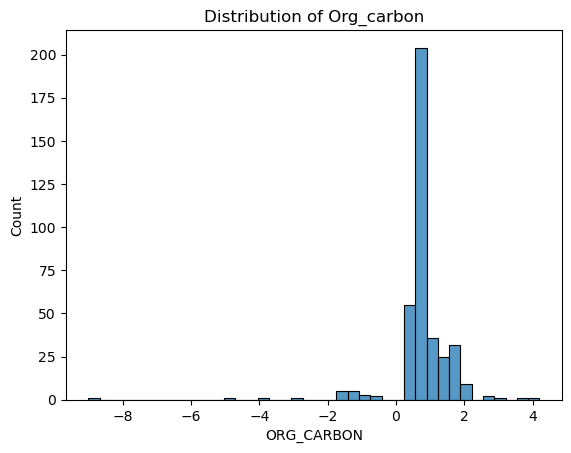



=================== PH_WATER ===========================



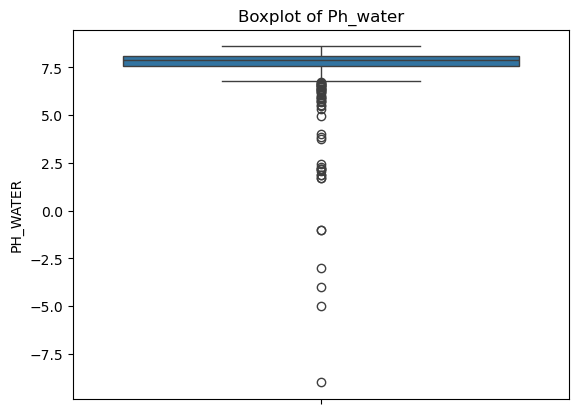

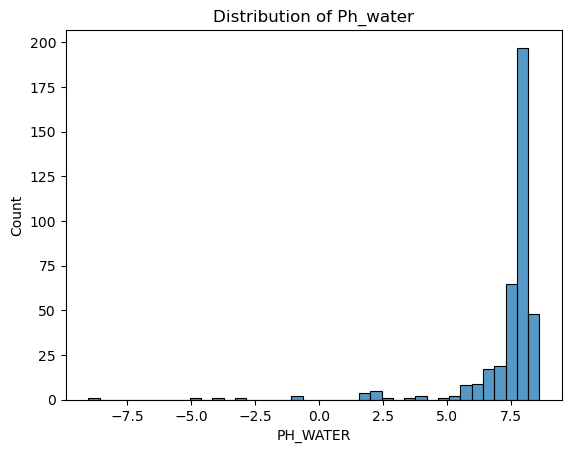



=================== TOTAL_N ===========================



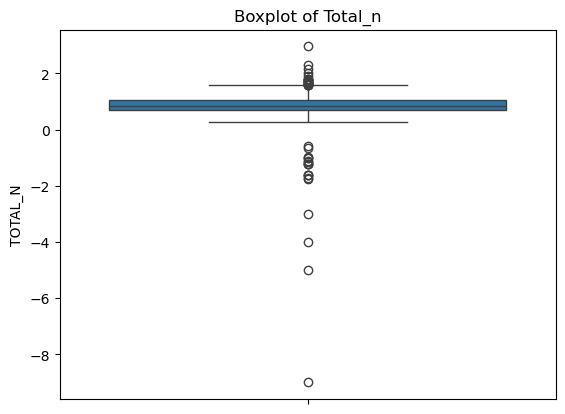

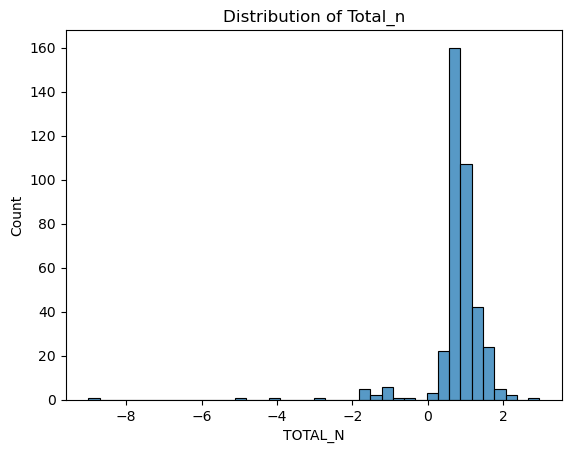



=================== CN_RATIO ===========================



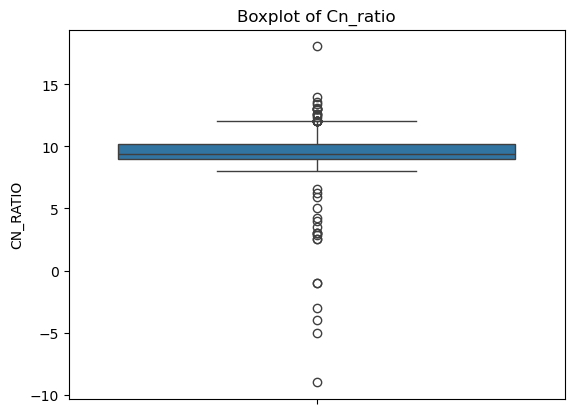

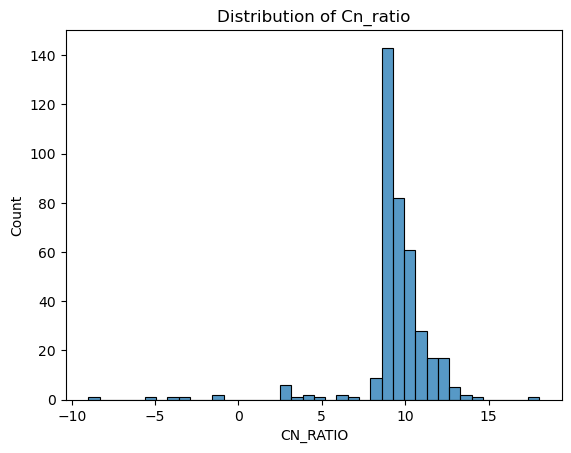



=================== CEC_SOIL ===========================



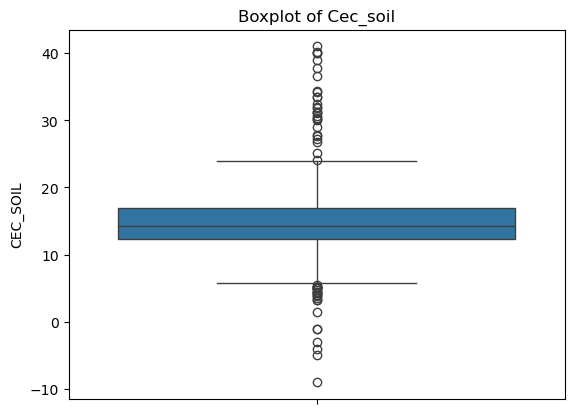

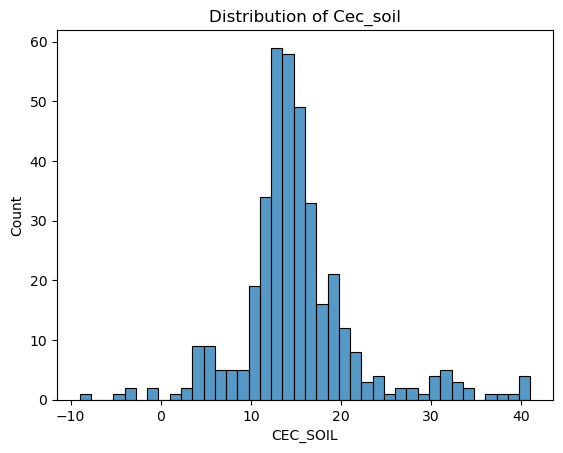



=================== CEC_CLAY ===========================



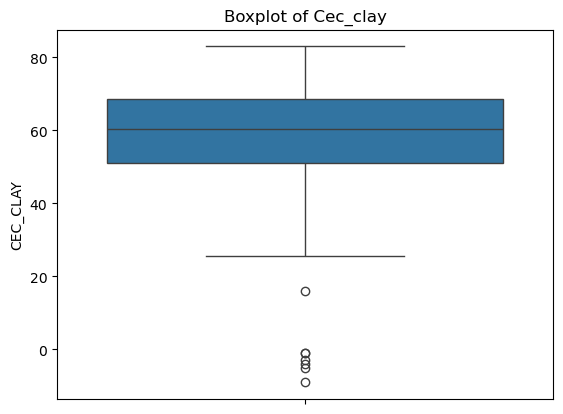

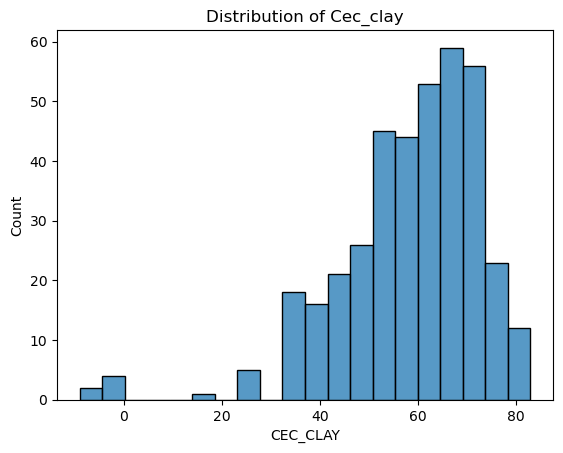



=================== CEC_EFF ===========================



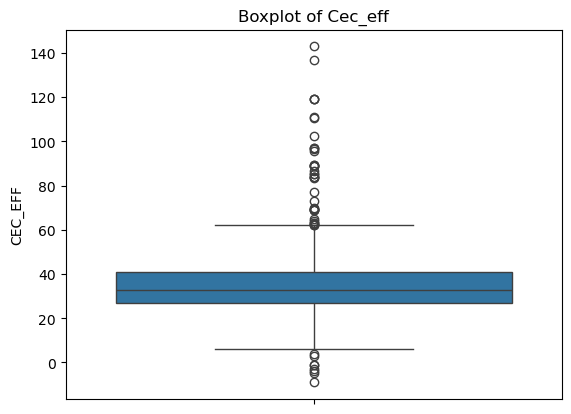

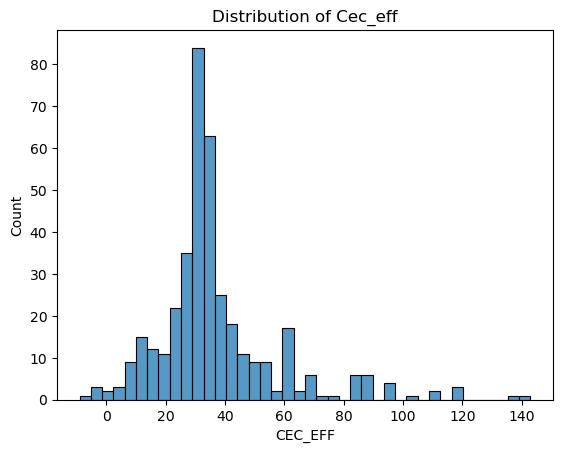



=================== TEB ===========================



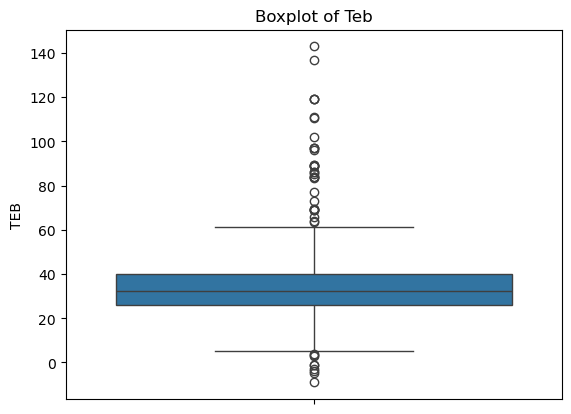

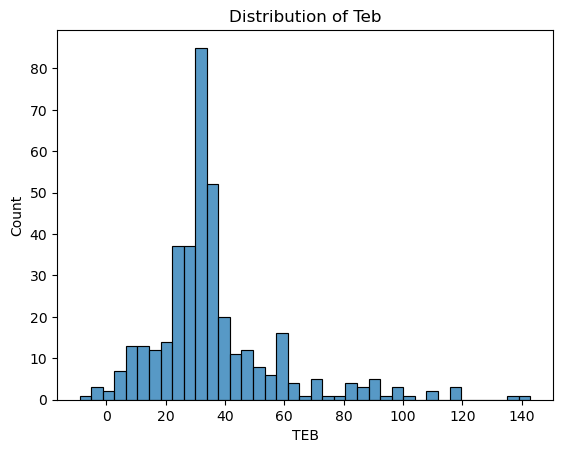



=================== BSAT ===========================



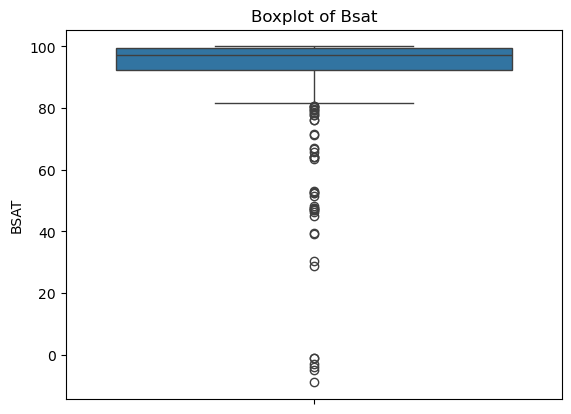

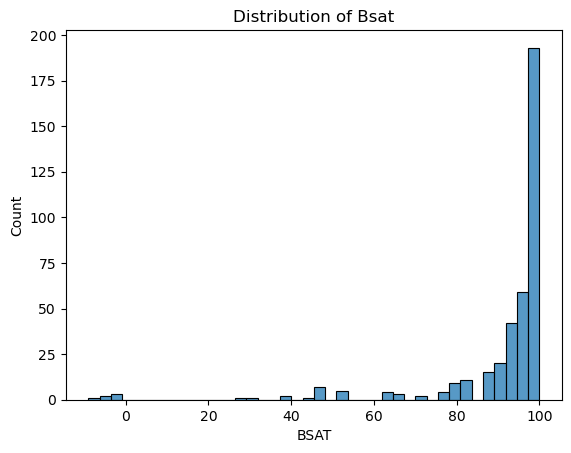



=================== ALUM_SAT ===========================



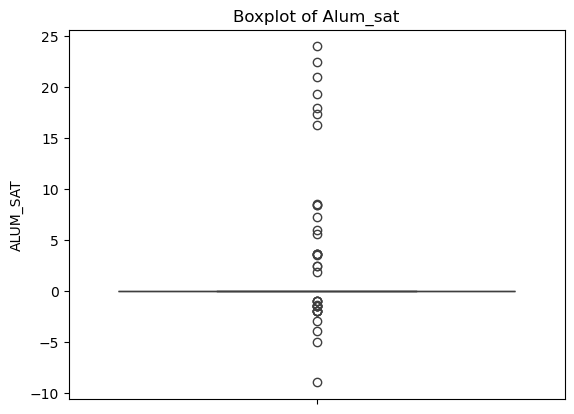

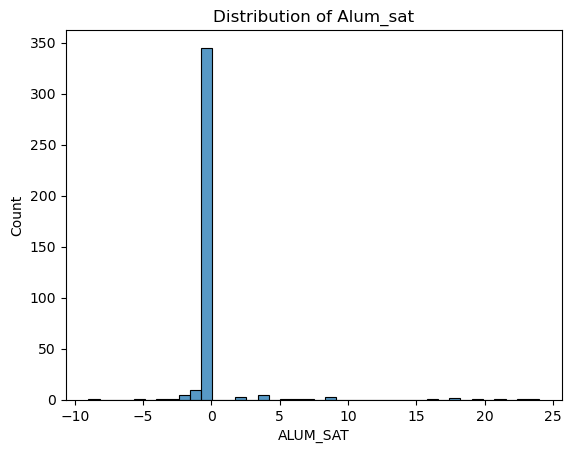



=================== ESP ===========================



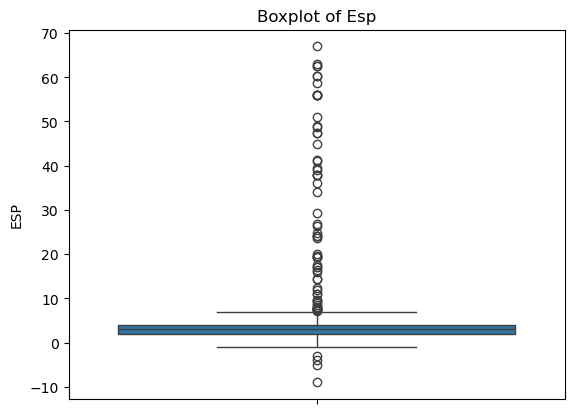

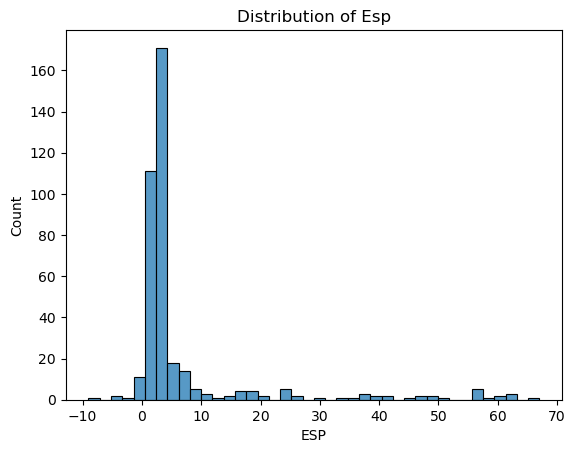



=================== TCARBON_EQ ===========================



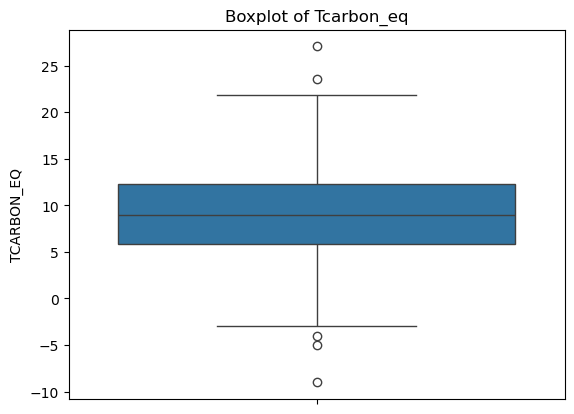

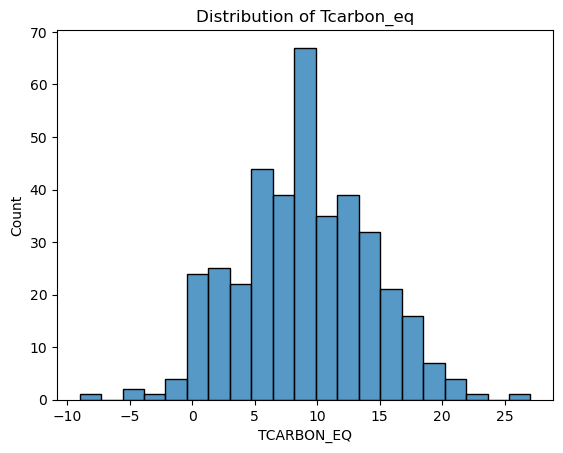



=================== GYPSUM ===========================



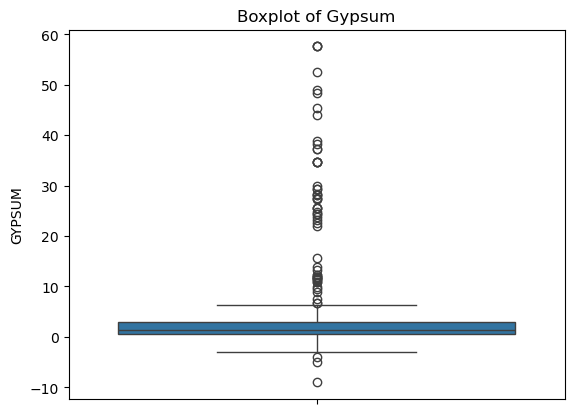

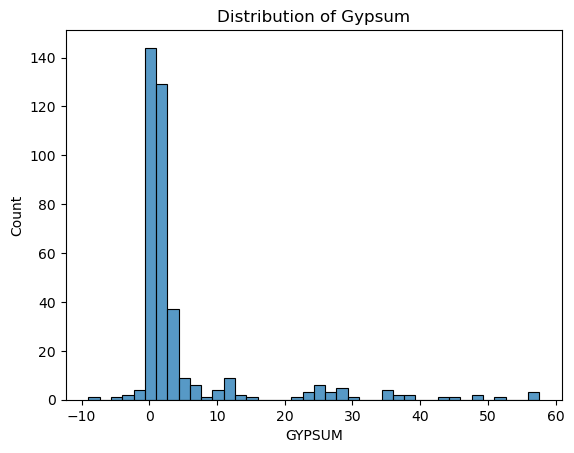



=================== ELEC_COND ===========================



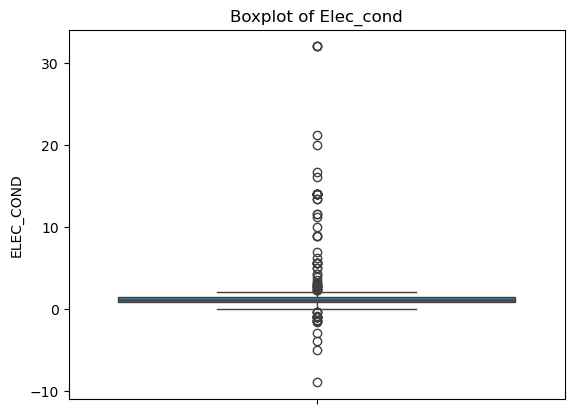

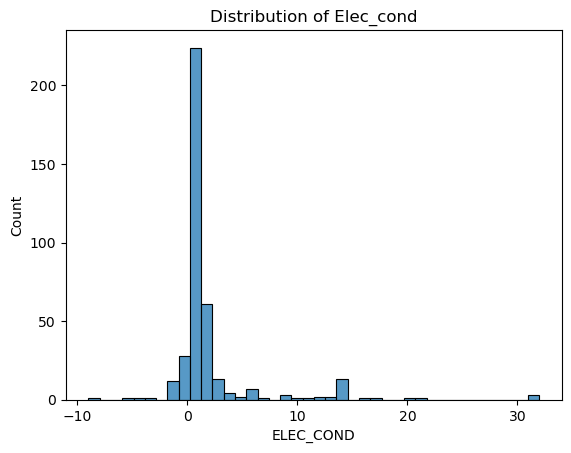

In [28]:
for feature in num_features:
    print(f"\n\n=================== {feature} ===========================\n")
    sns.boxplot(df, y=feature)
    plt.title(f"Boxplot of {feature.capitalize()}")
    plt.show()

    sns.histplot(df, x=feature)
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.show()



=================== TEXTURE_USDA ===========================



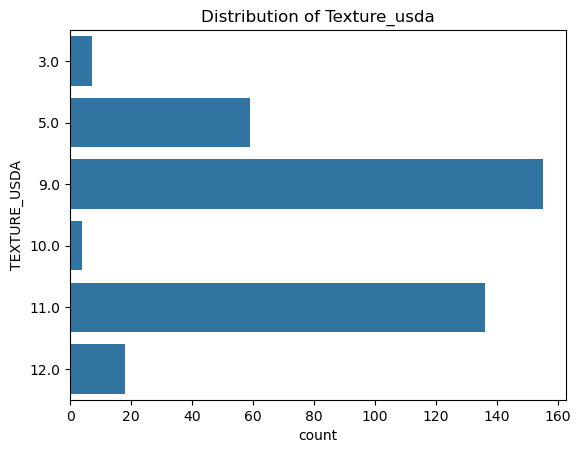



=================== TEXTURE_SOTER ===========================



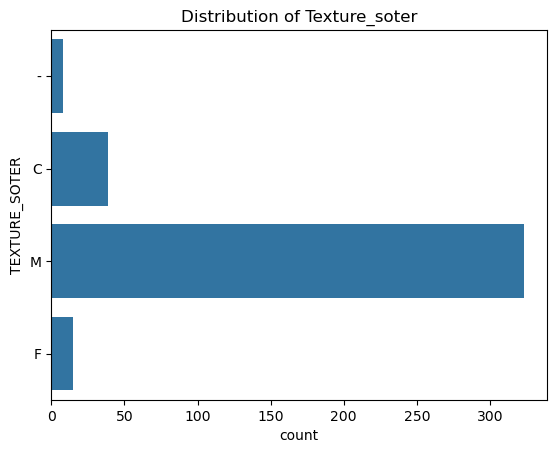

In [29]:
for feature in cat_features:
    print(f"\n\n=================== {feature} ===========================\n")

    sns.countplot(df, y=feature)
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.show()

## Bivariate Analysis

In [ ]:
sns.pairplot(df[num_features])
plt.title("Pairwise relationships - numerical features")

Text(0.5, 1.0, 'Pairwise relationships - numerical features')

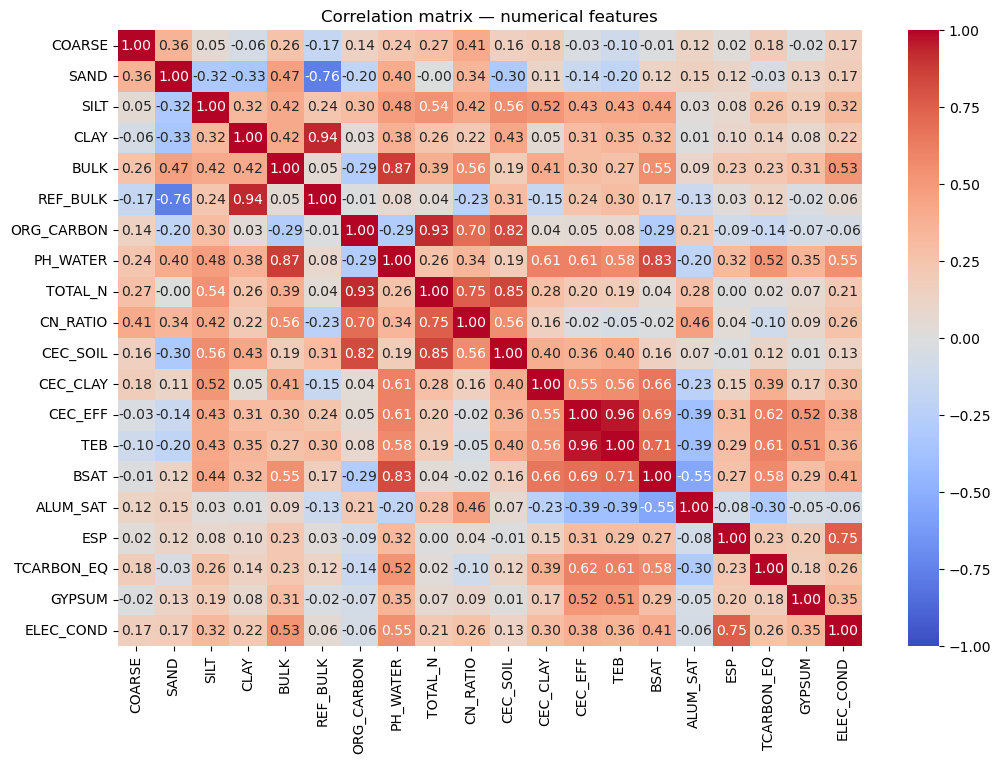

In [ ]:
corr = df[num_features].astype(float).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix — numerical features")
plt.show()